In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
sns.set(style="darkgrid",font_scale=1.5)

mpl.rcParams["font.family"]="SimHei"

mpl.rcParams["axes.unicode_minus"]=False
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("taobao.csv",dtype=str)


In [7]:
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [8]:
df.shape

(1048575, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
user_id          1048575 non-null object
item_id          1048575 non-null object
behavior_type    1048575 non-null object
user_geohash     330790 non-null object
item_category    1048575 non-null object
time             1048575 non-null object
dtypes: object(6)
memory usage: 48.0+ MB


In [10]:
df.isnull().sum()

user_id               0
item_id               0
behavior_type         0
user_geohash     717785
item_category         0
time                  0
dtype: int64

In [11]:
#计算缺失率
df.apply(lambda x:sum(x.isnull())/len(x))


user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.684534
item_category    0.000000
time             0.000000
dtype: float64

In [12]:
df.drop(["user_geohash"],axis=1,inplace=True)

In [13]:
df["date"]=df['time'].str[0:-3]
df["hour"]=df['time'].str[-2:]
df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21,2014-12-16,21


In [14]:
df["date"]=pd.to_datetime(df["date"])
df["time"]=pd.to_datetime(df["time"])
df["hour"]=df["hour"].astype(int)
df.dtypes
df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,1,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16 21:00:00,2014-12-16,21


In [15]:
df.sort_values(by="time",ascending=False,inplace=True)


df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
253919,20347929,11108563,1,4370,2014-12-18 23:00:00,2014-12-18,23
102898,117801453,209114197,2,6513,2014-12-18 23:00:00,2014-12-18,23
939227,69953834,293293996,1,4520,2014-12-18 23:00:00,2014-12-18,23
524092,31269707,169915137,1,11824,2014-12-18 23:00:00,2014-12-18,23
102862,117801453,199295336,1,6513,2014-12-18 23:00:00,2014-12-18,23


In [16]:
df.reset_index(drop=True,inplace=True)

df.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,20347929,11108563,1,4370,2014-12-18 23:00:00,2014-12-18,23
1,117801453,209114197,2,6513,2014-12-18 23:00:00,2014-12-18,23
2,69953834,293293996,1,4520,2014-12-18 23:00:00,2014-12-18,23
3,31269707,169915137,1,11824,2014-12-18 23:00:00,2014-12-18,23
4,117801453,199295336,1,6513,2014-12-18 23:00:00,2014-12-18,23


In [17]:
df.describe(include='object')
df["behavior_type"].value_counts()

1    987911
3     29427
2     20997
4     10240
Name: behavior_type, dtype: int64

In [18]:
df.describe()

,hour
count,1.048575e+06
mean,1.479212e+01
std,6.497533e+00
min,0.000000e+00
25%,1.000000e+01
50%,1.600000e+01
75%,2.000000e+01
max,2.300000e+01


In [19]:
df.describe(include='all')

,user_id,item_id,behavior_type,item_category,time,date,hour
count,1048575,1048575,1048575,1048575,1048575,1048575,1.048575e+06
unique,8477,701609,4,7095,744,31,NaN
top,36233277,112921337,1,1863,2014-12-11 22:00:00,2014-12-12 00:00:00,NaN
freq,3117,130,987911,33867,4615,59327,NaN
first,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.479212e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,6.497533e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01


In [20]:
df["date"].unique()

array(['2014-12-18T00:00:00.000000000', '2014-12-17T00:00:00.000000000',
       '2014-12-16T00:00:00.000000000', '2014-12-15T00:00:00.000000000',
       '2014-12-14T00:00:00.000000000', '2014-12-13T00:00:00.000000000',
       '2014-12-12T00:00:00.000000000', '2014-12-11T00:00:00.000000000',
       '2014-12-10T00:00:00.000000000', '2014-12-09T00:00:00.000000000',
       '2014-12-08T00:00:00.000000000', '2014-12-07T00:00:00.000000000',
       '2014-12-06T00:00:00.000000000', '2014-12-05T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', '2014-12-03T00:00:00.000000000',
       '2014-12-02T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2014-11-30T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-11-28T00:00:00.000000000', '2014-11-27T00:00:00.000000000',
       '2014-11-26T00:00:00.000000000', '2014-11-25T00:00:00.000000000',
       '2014-11-24T00:00:00.000000000', '2014-11-23T00:00:00.000000000',
       '2014-11-22T00:00:00.000000000', '2014-11-21

1)流量指标处理
pv：指的是页面总浏览量，每个用户每刷一次网页就会增加一次pv
uv：指的是独立访客数，一台电脑一个ip也就是一个独立访客

a.总计pv和uv

In [21]:
total_pv=df['user_id'].count()
total_uv=df["user_id"].nunique()


In [22]:
total_pv

1048575

In [23]:
total_uv

8477

b.日期维度下的uv和pv

In [24]:
pv_daily=df.groupby("date")["user_id"].count()
pv_daily.head()

date
2014-11-18    31581
2014-11-19    30567
2014-11-20    30598
2014-11-21    28039
2014-11-22    31283
Name: user_id, dtype: int64

In [25]:
uv_daily=df.groupby("date")["user_id"].nunique()
uv_daily.head()

date
2014-11-18    4283
2014-11-19    4301
2014-11-20    4276
2014-11-21    4144
2014-11-22    4122
Name: user_id, dtype: int64

In [26]:
pv_uv_daily=pd.concat([pv_daily,uv_daily],axis=1)
pv_uv_daily.columns=['pv','uv']
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,31581,4283
2014-11-19,30567,4301
2014-11-20,30598,4276
2014-11-21,28039,4144
2014-11-22,31283,4122


Text(0,0.5,'pv')

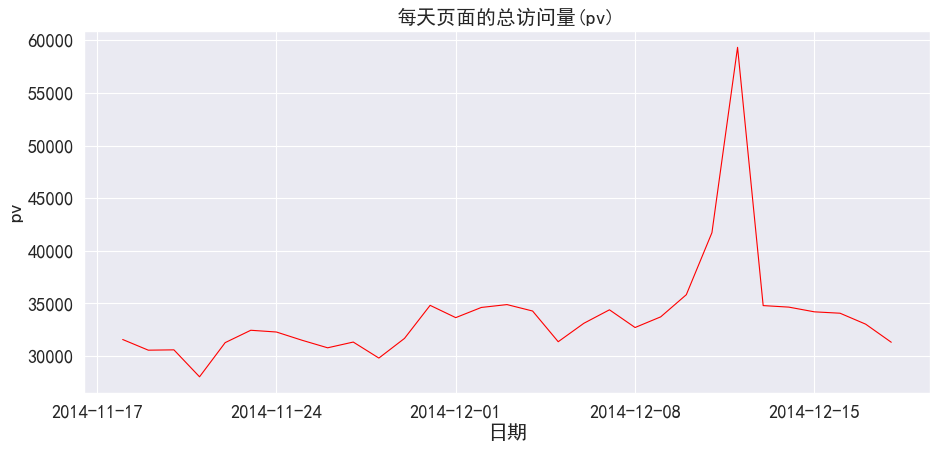

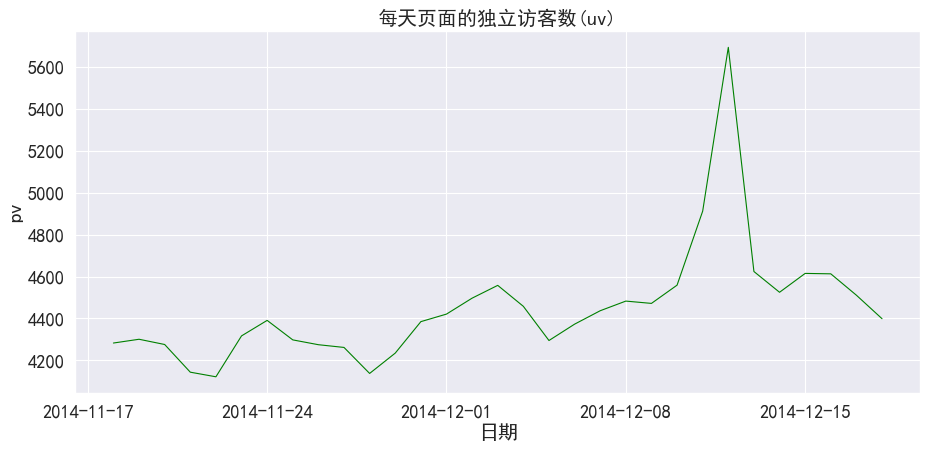

In [27]:
x=pv_uv_daily.index
y=pv_uv_daily['pv']
ys=pv_uv_daily['uv']
fig=plt.figure(figsize=(30,6) ,dpi=80)
ax1 = fig.add_subplot(1,2,1)  #创建2行1列的子图，开始绘制第一个子图ax1
plt.plot(x,y,color="red",linewidth=1 )
plt.title('每天页面的总访问量(pv)')
plt.xlabel('日期')  #设置x轴名称
plt.ylabel('pv')  #设置y轴名称


fig=plt.figure(figsize=(30,6) ,dpi=80)
ax2 = fig.add_subplot(1,2,1)  #创建2行1列的子图，开始绘制第一个子图ax1
plt.plot(x,ys,color="green",linewidth=1 )
plt.title('每天页面的独立访客数(uv)')
plt.xlabel('日期')  #设置x轴名称
plt.ylabel('pv')  #设置y轴名称


结果：从图中看出pv与u呈现高度正相关。双十二的时候页面访问量急剧上升，双十二之前每周内uv和pv都有先下降后上升趋势

c.时间维度下的uv和pv

In [28]:
pv_hour=df.groupby("hour")["user_id"].count()
pv_hour.head()

hour
0    44774
1    23376
2    12897
3     8624
4     6887
Name: user_id, dtype: int64

In [29]:
uv_hour=df.groupby("hour")["user_id"].apply(lambda x:x.nunique())
uv_hour.head()

hour
0    4067
1    2519
2    1651
3    1234
4    1098
Name: user_id, dtype: int64

In [30]:
pv_uv_hour=pd.concat([pv_hour,uv_hour],axis=1)
pv_uv_hour.columns=["pv_hour","uv_hour"]
pv_uv_hour.head()

,pv_hour,uv_hour
hour,,
0,44774,4067
1,23376,2519
2,12897,1651
3,8624,1234
4,6887,1098


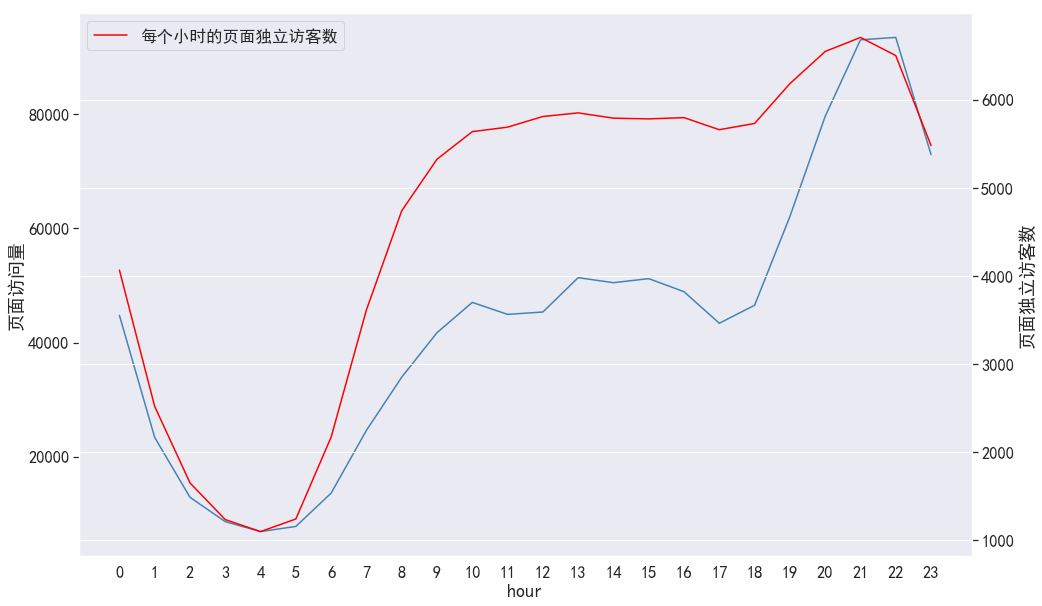

In [31]:
plt.figure(figsize=(16,10))
pv_uv_hour["pv_hour"].plot(c="steelblue",label="每个小时的页面访问总量")
plt.ylabel("页面访问量")

pv_uv_hour['uv_hour'].plot(c="red",label='每个小时的页面独立访客数',secondary_y=True)
plt.ylabel("页面独立访客数")
plt.xticks(pv_uv_hour.index)
plt.legend(loc="best")
plt.show()

从图中可以看到22:00点到5点页面的用户数量和页面访问量逐渐降低，6点至10点用户增多，页面访问量也逐渐 增多，10点到18点趋于平稳，18点以后到22:00用户迅速上升，冰达到一天中的最大值

2）用户行为指标

In [32]:
type_1=df[df["behavior_type"]=='1']["user_id"].count()
type_2=df[df["behavior_type"]=='2']["user_id"].count()
type_3=df[df["behavior_type"]=='3']["user_id"].count()
type_4=df[df["behavior_type"]=='4']["user_id"].count()
print("点击用户:",type_1)
print("收藏 :",type_2)
print("添加购物车用户:",type_3)
print("支付用户:",type_4)

点击用户: 987911
收藏 : 20997
添加购物车用户: 29427
支付用户: 10240


结果分析：用户从页面点击到完成支付，用户在不断的流失，具体从漏斗分析

日期维度下的用户行为

In [33]:
pv_date_type=pd.pivot_table(df,index='date',columns='behavior_type',values='user_id',aggfunc=np.size)
pv_date_type.columns=["点击","收藏","添加购物车","支付"]
pv_date_type.head()

,点击,收藏,添加购物车,支付
date,,,,
2014-11-18,29802,599,866,314
2014-11-19,28723,642,880,322
2014-11-20,28798,630,877,293
2014-11-21,26403,616,778,242
2014-11-22,29538,592,854,299


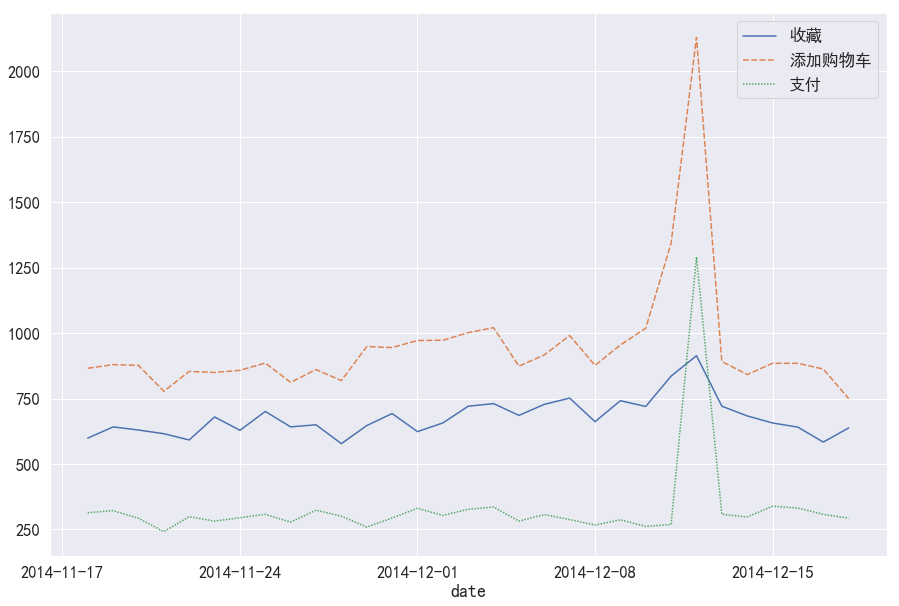

In [34]:
plt.figure(figsize=(15,10))
sns.lineplot(data=pv_date_type[['收藏','添加购物车','支付']])


时间维度下的用户行为

In [35]:
pv_hour_type=pd.pivot_table(df,index='hour',columns='behavior_type',values='user_id',aggfunc=np.size)
pv_hour_type.columns=["点击","收藏","添加购物车","支付"]
pv_hour_type.head()

,点击,收藏,添加购物车,支付
hour,,,,
0,42145,954,1219,456
1,22120,540,550,166
2,12219,276,331,71
3,8200,163,220,41
4,6478,174,201,34


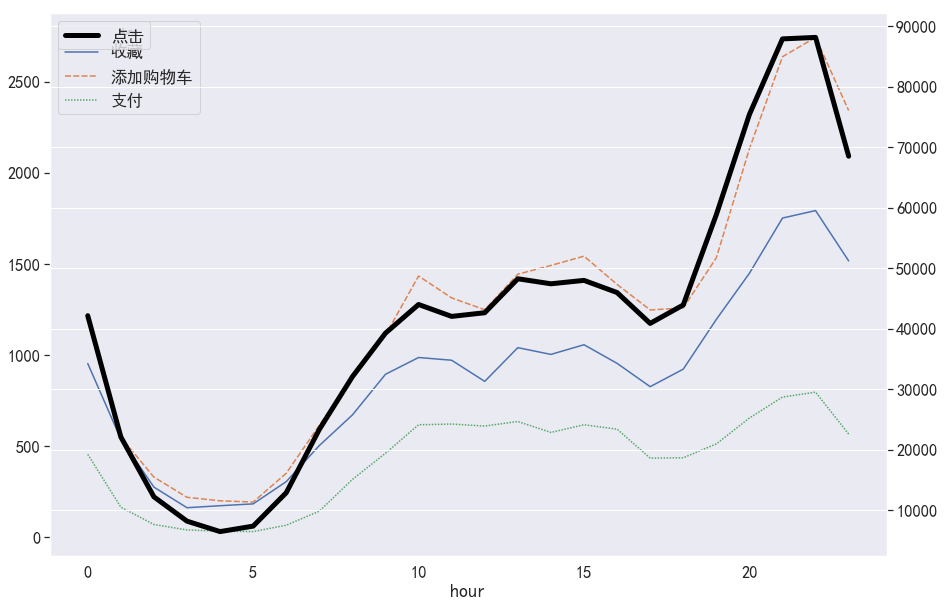

In [36]:
plt.figure(figsize=(15,10))
sns.lineplot(data=pv_hour_type[['收藏','添加购物车','支付']])
pv_hour_type["点击"].plot(c='black',linewidth=5,label="点击",secondary_y=True)
plt.legend(loc="best")

In [37]:
df["user_id1"]=df["user_id"]
buy_first=pd.pivot_table(df,index="user_id",columns="behavior_type",values="user_id1",aggfunc="count")
buy_first.columns=["点击","收藏","添加购物车","支付"]
buy_first_10=buy_first.sort_values(by='支付',ascending=False)[:10]
buy_first_10

,点击,收藏,添加购物车,支付
user_id,,,,
122338823,857.0,NaN,84.0,82.0
123842164,1159.0,14.0,57.0,49.0
51492142,819.0,28.0,55.0,44.0
56560718,554.0,41.0,36.0,33.0
33448326,293.0,3.0,19.0,22.0
35306096,272.0,10.0,59.0,21.0
62068426,520.0,2.0,30.0,20.0
60674956,103.0,10.0,17.0,19.0
40364641,262.0,1.0,30.0,19.0


Text(0.5,1,'添加购物车的变化趋势')

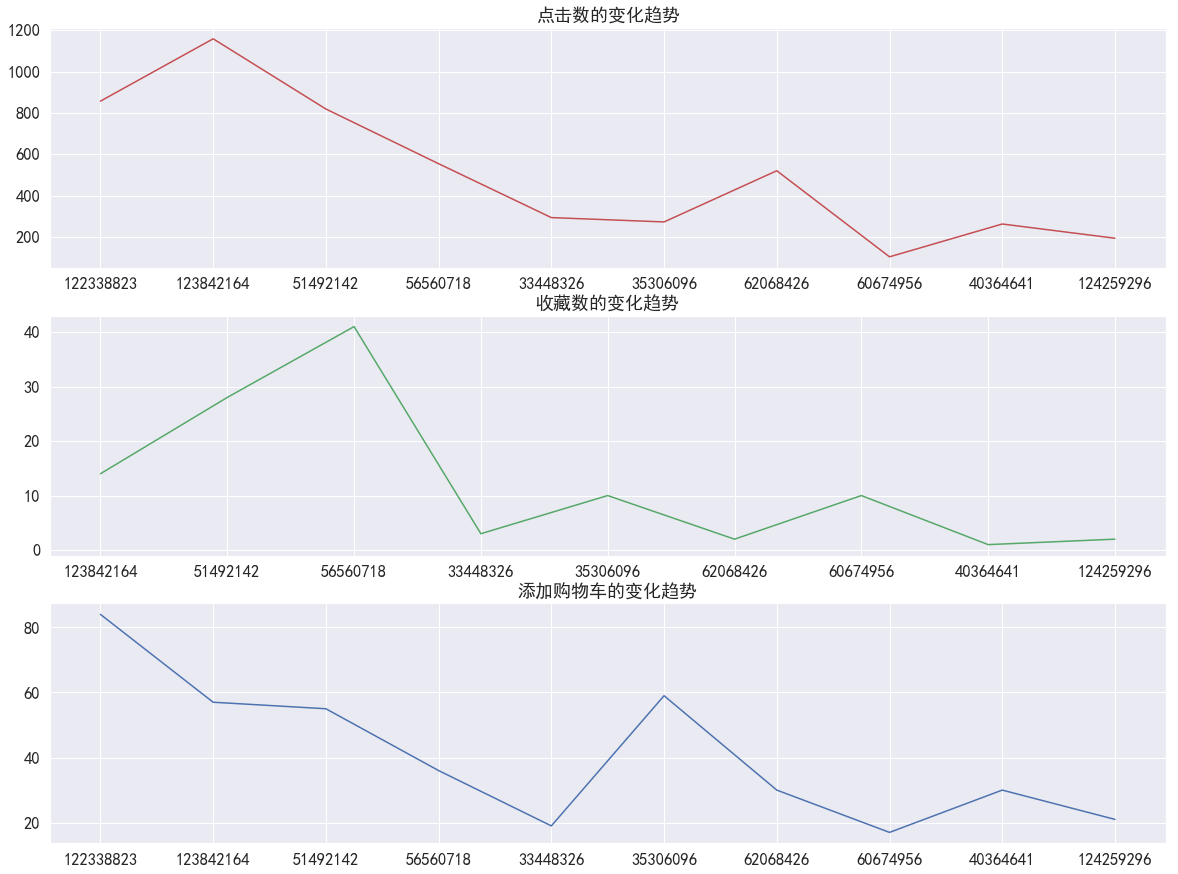

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(buy_first_10["点击"],c="r")
plt.title("点击数的变化趋势")
plt.subplot(3,1,2)
plt.plot(buy_first_10["收藏"],c="g")
plt.title("收藏数的变化趋势")
plt.subplot(3,1,3)
plt.plot(buy_first_10["添加购物车"],c="b")
plt.title("添加购物车的变化趋势")



结果：我们可以看出支付次数最多的其点击收藏添加购物车不一定也多

ARPPU分析：平均每用支付户的收入，即总收入/AU

In [39]:
total_custome=df[df["behavior_type"]=="4"].groupby(["date","user_id"]).count().reset_index().rename(columns={"behavior_type":'total'})
total_custome.head()

,date,user_id,item_id,total,item_category,time,hour,user_id1
0,2014-11-18,100024529,1,1,1,1,1,1
1,2014-11-18,100128093,1,1,1,1,1,1
2,2014-11-18,101461439,1,1,1,1,1,1
3,2014-11-18,101538639,4,4,4,4,4,4
4,2014-11-18,10184170,1,1,1,1,1,1


In [40]:
total_costome1=total_custome.groupby("date").sum()["total"]/total_custome.groupby("date").count()["total"]
total_costome1.head()

date
2014-11-18    1.207692
2014-11-19    1.248062
2014-11-20    1.290749
2014-11-21    1.174757
2014-11-22    1.272340
Name: total, dtype: float64

Text(0.5,1,'每日的人均消费次数')

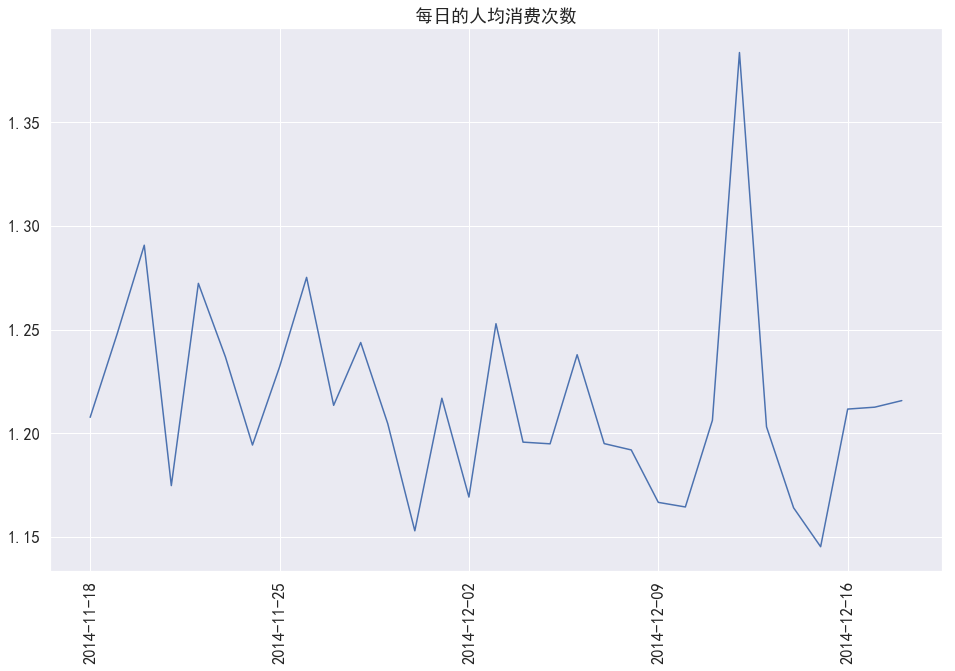

In [41]:
x=len(total_costome1.index.astype(str))
y=total_costome1.index.astype(str)
plt.figure(figsize=(16,10))
plt.plot(total_costome1.values)
plt.xticks(range(0,30,7),[y[i]for i in range(0,x,7)],rotation=90)
plt.title("每日的人均消费次数")

日ARPU分析：平均所有用户收入

In [42]:
df["operation"]=1
aa=df.groupby(["date","user_id","behavior_type"]).count().reset_index().rename(columns={"operation":'total'})
aa.head()

,date,user_id,behavior_type,item_id,item_category,time,hour,user_id1,total
0,2014-11-18,100001878,1,6,6,6,6,6,6
1,2014-11-18,100001878,3,2,2,2,2,2,2
2,2014-11-18,100024529,1,27,27,27,27,27,27
3,2014-11-18,100024529,3,1,1,1,1,1,1
4,2014-11-18,100024529,4,1,1,1,1,1,1


In [43]:
aa1=aa.groupby("date").apply(lambda x:x[x["behavior_type"]=="4"]["total"].sum()/x["user_id"].nunique())
aa1.head()

date
2014-11-18    0.073313
2014-11-19    0.074866
2014-11-20    0.068522
2014-11-21    0.058398
2014-11-22    0.072538
dtype: float64

Text(0.5,1,'每日的活跃用户消费次数')

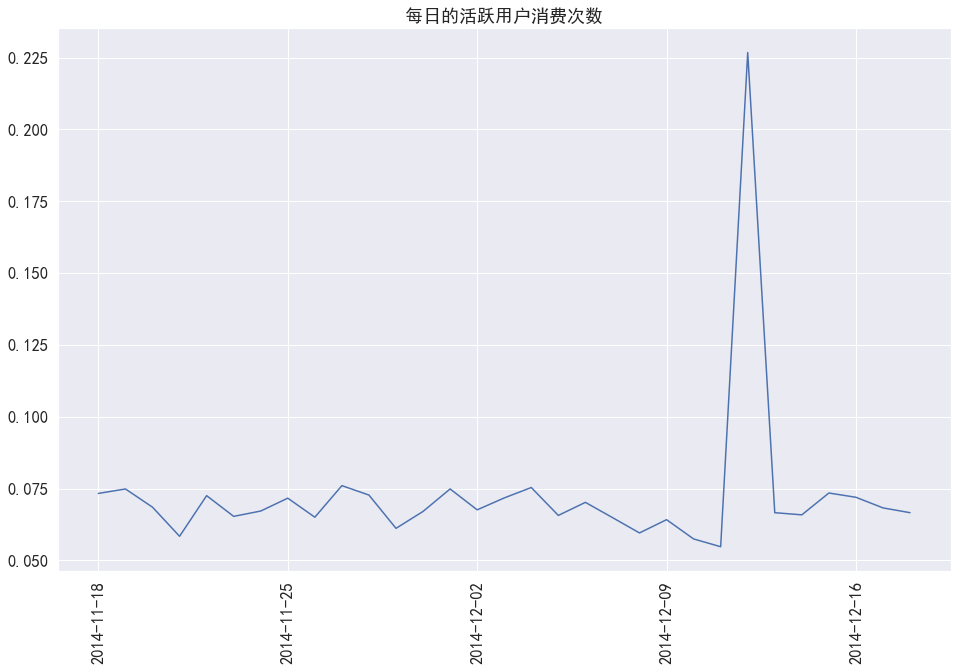

In [44]:
x=len(aa1.index.astype(str))
y=aa1.index.astype(str)
plt.figure(figsize=(16,10))
plt.plot(aa1.values)
plt.xticks(range(0,30,7),[y[i]for i in range(0,x,7)],rotation=90)
plt.title("每日的活跃用户消费次数")

付费率PUR，消费人数/活跃人数

In [45]:
rate=aa.groupby("date").apply(lambda x:x[x["behavior_type"]=="4"]["total"].count()/x["user_id"].nunique())
rate.head()

date
2014-11-18    0.060705
2014-11-19    0.059986
2014-11-20    0.053087
2014-11-21    0.049710
2014-11-22    0.057011
dtype: float64

Text(0.5,1,'每日付费率')

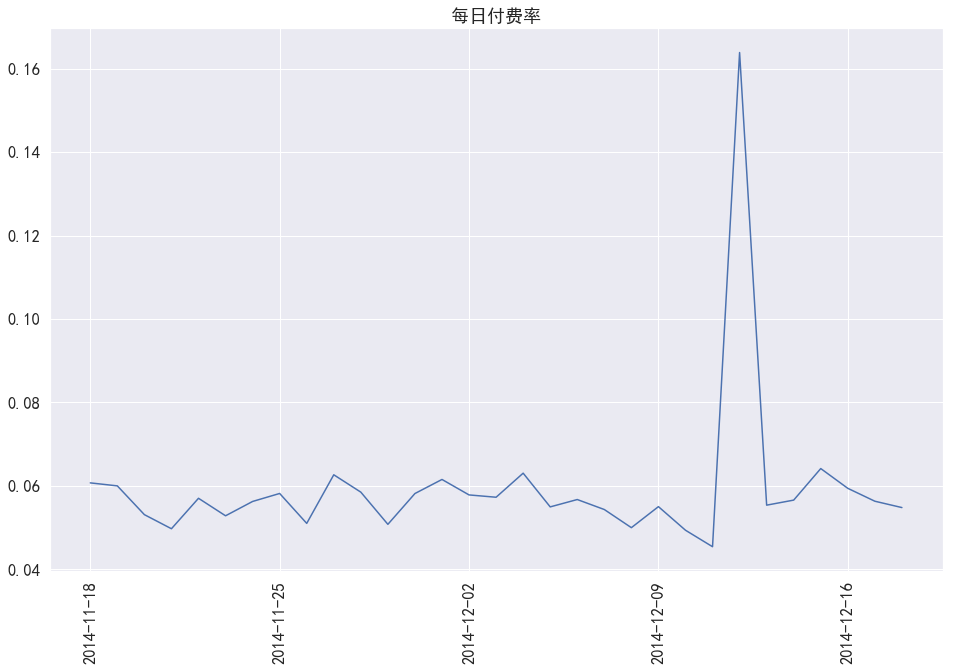

In [46]:
x=len(rate.index.astype(str))
y=rate.index.astype(str)
plt.figure(figsize=(16,10))
plt.plot(rate.values)
plt.xticks(range(0,30,7),[y[i]for i in range(0,x,7)],rotation=90)
plt.title("每日付费率")

复购情况分析

In [47]:
re_buy=df[df["behavior_type"]=="4"].groupby("user_id")["date"].apply(lambda x:x.nunique())
re_buy[re_buy>=2].count()/re_buy.count()

0.469284064665127

3）漏斗分析

In [48]:
df_count=df.groupby("behavior_type").size().reset_index().rename(columns={"behavior_type":"环节",0:"人数"})
df_count

,环节,人数
0,1,987911
1,2,20997
2,3,29427
3,4,10240


In [49]:
type_dict={"1":"点击",
          "2":"收藏",
          "3":"添加购物车",
          "4":"支付"}
df_count["环节"]=df_count["环节"].map(type_dict)
df_count

,环节,人数
0,点击,987911
1,收藏,20997
2,添加购物车,29427
3,支付,10240


In [50]:
a=df_count.iloc[0]["人数"]
b=df_count.iloc[1]["人数"]
c=df_count.iloc[2]["人数"]
d=df_count.iloc[3]["人数"]
funnel=pd.DataFrame({"环节":["点击","收藏及添加购物车","支付"],"人数":[a,b+c,d]})
funnel

,环节,人数
0,点击,987911
1,收藏及添加购物车,50424
2,支付,10240


In [51]:
funnel["总体转化率"]=[i/funnel["人数"][0]for  i in  funnel["人数"]]

                  

In [52]:
funnel["单一转化率"]=np.array([1.0,2.0,3.0])
funnel

,环节,人数,总体转化率,单一转化率
0,点击,987911,1.000000,1.0
1,收藏及添加购物车,50424,0.051041,2.0
2,支付,10240,0.010365,3.0


In [53]:
for i in range(0,len(funnel["人数"])):
    if i==0:
        funnel["单一转化率"][i]=1.0
    else:
        funnel["单一转化率"][i]=funnel["人数"][i]/funnel["人数"][i-1]
funnel

,环节,人数,总体转化率,单一转化率
0,点击,987911,1.000000,1.000000
1,收藏及添加购物车,50424,0.051041,0.051041
2,支付,10240,0.010365,0.203078


In [58]:
import plotly.express as px
import plotly.graph_objs as go

trace=go.Funnel(
    y=['点击','收藏及添加购物车','购买'],
    x=[funnel["人数"][0],funnel['人数'][1],funnel["人数"][2]],
    textinfo="value+percent initial",
    marker=dict(color=["deepskyblue","lightsalmon","tan"]),
    connector={'line':{'color':'royalblue','dash':'solid','width':3}})

data=[trace]
fig=go.Figure(data)
fig.show()


结果：由于收藏和添加购物车都是有购买意向的用户行为，也不分先后顺序，将其合并成一种阶段，从漏斗图中看出，从浏览到具有购买意向只有5%的转化率，但是真正购买的转化率只有1%，从funnel表中看到从具有购买意向到真正购买的转换率有20%，说明从浏览到进行收藏和加入购物车是需要指标提升的

4）RFM(客户价值分析)

In [66]:
#R
from datetime import datetime

recent_buy=df[df["behavior_type"]=="4"].groupby("user_id")["date"].apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1]).reset_index().rename(columns={"date":"recent"})
recent_buy["recent"]=recent_buy["recent"].apply(lambda x:x.days)
                                                                       
                                                                       

recent_buy[:10]
                                                                     

,user_id,recent
0,100001878,10
1,100012968,25
2,100024529,31
3,100027681,22
4,100035725,21
5,100042340,2
6,100067745,16
7,100078685,9
8,100086267,4
9,100112744,8


In [68]:
#F
buy_freq=df[df["behavior_type"]=='4'].groupby('user_id')["date"].count().reset_index().rename(columns={'date':'freq'})
buy_freq[:10]

,user_id,freq
0,100001878,3
1,100012968,2
2,100024529,2
3,100027681,4
4,100035725,1
5,100042340,1
6,100067745,2
7,100078685,1
8,100086267,6
9,100112744,1


In [71]:
rfm=pd.merge(recent_buy,buy_freq,on='user_id')
rfm[:10]
rfm.describe()

,recent,freq
count,4330.000000,4330.000000
mean,12.729561,2.364896
std,8.462414,2.565000
min,2.000000,1.000000
25%,6.000000,1.000000
50%,10.000000,2.000000
75%,19.000000,3.000000
max,32.000000,82.000000


In [96]:
r_bins=[0,5,10,15,20,50]
f_bins=[0,20,40,50,70,90]
rfm['r_score']=pd.cut(rfm["recent"],bins=r_bins,labels=[5,4,3,2,1],right=False)
rfm['f_score']=pd.cut(rfm['freq'],bins=f_bins,labels=[1,2,3,4,5],right=False)
for i in ["r_score","f_score"]:
    rfm[i] =rfm[i].astype(float)
rfm.describe()

,recent,freq,r_score,f_score
count,4330.000000,4330.000000,4330.000000,4330.000000
mean,12.729561,2.364896,3.060739,1.002771
std,8.462414,2.565000,1.434730,0.080376
min,2.000000,1.000000,1.000000,1.000000
25%,6.000000,1.000000,2.000000,1.000000
50%,10.000000,2.000000,3.000000,1.000000
75%,19.000000,3.000000,4.000000,1.000000
max,32.000000,82.000000,5.000000,5.000000


In [97]:
rfm["r"]=np.where(rfm["r_score"]>3.060739,"高",'低')
rfm["f"]=np.where(rfm["f_score"]>1.001155,"高",'低')
rfm["value"]=rfm["r"].str[:]+rfm["f"].str[:]
rfm.describe(include="all")

,user_id,recent,freq,r_score,f_score,r,f,value,标签
count,4330,4330.000000,4330.000000,4330.000000,4330.000000,4330,4330,4330,4330
unique,4330,NaN,NaN,NaN,NaN,2,2,4,3
top,42112755,NaN,NaN,NaN,NaN,低,低,低低,重要挽回客户
freq,1,NaN,NaN,NaN,NaN,2185,4323,2184,2185
mean,NaN,12.729561,2.364896,3.060739,1.002771,NaN,NaN,NaN,NaN
std,NaN,8.462414,2.565000,1.434730,0.080376,NaN,NaN,NaN,NaN
min,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,6.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,10.000000,2.000000,3.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,19.000000,3.000000,4.000000,1.000000,NaN,NaN,NaN,NaN


In [98]:
def trans_labels(x):
    if x=="高高":
        return "重要价值客户"
    elif x=="低高":
        return "重要唤回客户"
    elif x=="高低":
        return "重要深耕用户"

    else:
        return "重要挽回客户"
rfm["标签"]=rfm["value"].apply(trans_labels)
rfm["标签"].value_counts()

重要挽回客户    2184
重要深耕用户    2139
重要价值客户       6
重要唤回客户       1
Name: 标签, dtype: int64